## Chapter 1:

In [41]:
# libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import pymc3 as pm
import arviz as az

,mean,sd,hdi_3%,hdi_97%
theta,0.72,0.05,0.64,0.8


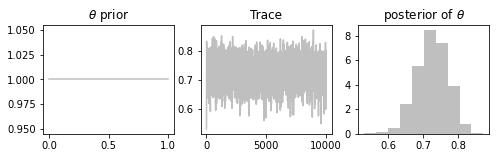

In [56]:
# diy MCMC algorithm using metroplis hasting algorithm

def post(theta, Y, alpha=1, beta=1):
    if 0 <= theta <= 1:
        prior = stats.beta(alpha, beta).pdf(theta) # pdf of a given point
        likelihood = stats.bernoulli(theta).pmf(Y).prod() 
        prob = prior * likelihood
    else:
        prob = -np.inf
    return prob

# try it out
# plot the beta distribution
x = np.linspace(0, 1, 100)
#plt.plot(x, stats.beta.pdf(x, 2, 2))

# plot a given point based on theta
theta = 0.5
#plt.plot(theta, stats.beta.pdf(theta, 2, 2), 'ro')

# create some fake data
Y = stats.bernoulli(0.75).rvs(100)

# run our algorithm
n_iter = 10000
can_sd = 0.05
alpha=beta=1
trace = {'theta': np.zeros(n_iter)}

p2 = post(theta, Y, alpha, beta)

for iter in range(n_iter):
    
    # propose a new value from a prior distribution
    # based on the normal distro
    theta_prop = stats.norm(theta, can_sd).rvs(1)
    
    # calculate the probability of the proposed value
    p1 = post(theta_prop, Y, alpha, beta)
    
    # calculate the probability of the current value
    pa = p1 /p2

    if pa > stats.uniform(0, 1).rvs(1):
        theta = theta_prop
        p2 = p1
    # store the value
    trace['theta'][iter] = theta

# create a plot of the trace and posterior
_, axes = plt.subplots(1, 3, sharey=False, figsize=(8, 2))

# plot the prior
axes[0].plot(x, stats.beta.pdf(x, alpha, beta), color='0.75')
axes[1].plot(trace['theta'], color='0.75')
axes[2].hist(trace['theta'], color='0.75', density=True)

axes[0].set_title('$\\theta$ prior')
axes[1].set_title('Trace')
axes[2].set_title('posterior of $\\theta$')

# summarize the trace
az.summary(trace, kind='stats', round_to=2)